## Implement a Basic Driving Agent

**QUESTION** Observe what you see with the agent's behavior as it takes random actions. Does the **smartcab** eventually make it to the destination? Are there any other interesting observations to note?

**ANSWER**
*When set the agent to take random actons, the **smartcab** would drive around randomly. After letting it drives around for long enough, eventually, sometimes it gets lucky and it does make it to the destination. But it appears to be completely random and due to luck. It also appears that the **smartcab** would sometimes break transportation rules and run into accidents, but it does not seem to learn from mistakes. Its behavior does not seem to improve even after recieving penalty, nor does it appear to responding to rewards.*
***

## Inform the Driving Agent

**QUESTION** What states have you identified that are appropriate for modeling the smartcab and environment? Why do you believe each of these states to be appropriate for this problem?

**ANSWER** 
*The self.state `[self.state=(inputs['light'], inputs['oncoming'], inputs['left'], inputs['right'], self.next_waypoint)]` attribute for LearningAgent is set to be taking the following three conditions into consideration as for the purpose of modeling the smartcab and its environment: 1) the transportation light (green or red); 2) the traffic situation at the intersection (whether or not there is traffic in the oncoming, left, and right directions); 3) the planned next way point. The overall goal of one smartcab trip is to get to the destination **without violating transportation rules nor running into accidents** as fast as possible, hence the state of transportation light of an intersection is important state information to inform the LearningAgent so that it could learn not to violate transportation rule (would receive negative rewards if it violates). The information regarding to traffic state around the smartcab and its next way point is crucial for teaching the LearningAgent to drive safely. The agent's variable `[deadline]` is another factor which is potentially useful state information, however it was not added into forming the LearningAgent's self.state attribute. Because adding `[deadline]` expands the number of self.state by a factor of 20~30. The solution to the MDP problem asks the algorithm to visit every states infinitely often, given the setting of the number of simulation trial runs (~100), a relatively smaller size of self.state is more desireable. In addition, the practical training result of this self.state setting without `[deadline]` info seems to be good enough. (details see the following sections)*
***
**QUESTION** How many states in total exist for the smartcab in this environment? Does this number seem reasonable given that the goal of Q-Learning is to learn and make informed decisions about each state? Why or why not?

**ANSWER**
*There are 32 states in total exist for the smartcab in this environment. This number seems reasonable for Q-Learning to learn and make informed decisions about each state. If set the trial run number of the simulation to be 100, and assume that for each trial simulation run, the smartcab takes 20 actions and experiences 20 states on average before it terminates (either because of successfully reach the destination or trip aborts due to run out of time), so the smartcab is expected to experience ~2000 states in total. This number seems to be reasonably large enough to ensure that all 32 states would be appeared/seen so that Q-Learning could learn about.*

## Implement a Q-Learning Agent

**QUESTION** What changes do you notice in the agent's behavior when compared to the basic driving agent when random actions were always taken? Why is this behavior occurring?

**ANSWER**
*After implementing Q-Learning, the agent appears to be no longer randomly driving around, and it seems to be responding to the rewards and penalties that its receiving after taking certain actions while its at certain states. Its rate of deliverying customer to destination before time runs out obviously has improved as compared to when it's taking random behaviors. The reason for this difference is that Q-Learning algorithm `[Q(state, action) = Immediate_Reward + discount_factor x argmax (Q(future_state, future_action))]` is teaching the agent by rewarding agent's correct behavior (positive rewards for taking the right action at the right state), and punishing its incorrect behavior (negative rewards if it violates transportation rule or runs into accidents). *

## Improve the Q-Learning Driving Agent

**QUESTION** Report the different values for the parameters tuned in your basic implementation of Q-Learning. For which set of parameters does the agent perform best? How well does the final driving agent perform?

**ANSWER**

**QUESTION**  Does your agent get close to finding an optimal policy, i.e. reach the destination in the minimum possible time, and not incur any penalties? How would you describe an optimal policy for this problem?

**ANSWER**

### Q-Learning Parameter Tuning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Zhongyu/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [13]:
data = pd.read_csv('data.csv')
data = data.drop('Unnamed: 0', axis=1)

In [15]:
data.head()

,deadline,destination,end_time,net_reward,parameters,penalty,start,success
0,20,"(5, 6)",0,0.0,"(None, 0.5, 0.1)",0.0,"(4, 3)",False
1,25,"(7, 3)",0,-1.5,"(None, 0.5, 0.1)",-7.5,"(4, 5)",False
2,45,"(8, 6)",0,8.0,"(None, 0.5, 0.1)",-10.0,"(3, 2)",False
3,20,"(7, 2)",3,24.5,"(None, 0.5, 0.1)",-15.5,"(5, 4)",True
4,25,"(6, 4)",13,10.0,"(None, 0.5, 0.1)",-8.0,"(3, 6)",True


***
**Success Rate for Delivering the Customer to Destination before Time Out**

In [16]:
param = set(data['parameters'])

In [17]:
success_rate = []
for p in param:
    p_bool = data['parameters']==p
    s = data['success'][p_bool]
    rate = sum(s)*1./len(s)
    success_rate.append(rate)

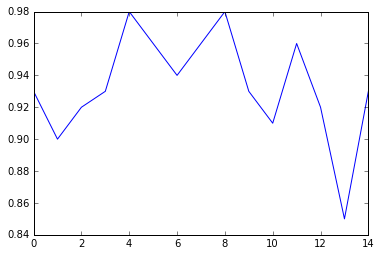

In [20]:
param_id = range(len(param))
plt.plot(param_id, success_rate)